# Recognition of Hand Gestures

The dataset is the SKELETAL part of the <a href=http://www-rech.telecom-lille.fr/shrec2017-hand/>DHG/Shrec2017 public benchmark</a> for hand gesture recognition.

The full benchmark, recorded with Intel Real Sense RGB-Depth camera, contains 3 modalities: RGB video, depth video, and skeletal (i.e. only the estimated trajectories of joints). 

Such skeletal (“pose”) representations are lightweight and very sparse compared to image and video representations. <b>Several sensors now directly provide streams of body skeletons or hand skeletons: e.g. Leap Motion, Kinect camera, RealSense camera, or motion capture suits and gloves. It is also possible to extract the pose information from videos using vision-based approaches like OpenPose, AlphaPose, or Google’s Media Pipe at a good frame rate.</b>

![Hand skeleton from RealSense](http://www-rech.telecom-lille.fr/shrec2017-hand/images/skeleton.png)

This dataset contains <b>1960 training examples and 837 test examples. There are 2 types of labels: "coarse" labels with 14 classes, and "fine-grained" labels with 28 classes.
Each example consists in the space 3D trajectories of 22 hand joints, therefore 3x22 = 66 time series.<b>


# I/ Load data and preprocess data 

In [ ]:
import pickle
def load_data(filepath='./shrec2017_skel-data.pckl'):
    """
    Each sequence has two different labels.
    The firs@t label  Y describes the gesture class out of 14 possible gestures (e.g. swiping your hand to the right).
    The second label Y describes the gesture class out of 28 possible gestures (e.g. swiping your hand to the right with your index pointed, or not pointed).
    """
    file = open(filepath, 'rb')
    data = pickle.load(file, encoding='latin1')  # <<---- change to 'latin1' to 'utf8' if the data does not load
    file.close()
    return data['x_train'], data['x_test'], data['y_train_14'], data['y_train_28'], data['y_test_14'], data['y_test_28']

In [2]:
import numpy
from scipy import ndimage as ndimage
def resize_sequences_length(x_train, x_test, final_length=100):
    """
    Resize the time series by interpolating them to the same length
    """
    # please use python3. if you still use python2, important note: redefine the classic division operator / by importing it from the __future__ module
    x_train = numpy.array([numpy.array([ndimage.zoom(x_i.T[j], final_length / len(x_i), mode='reflect') for j in range(numpy.size(x_i, 1))]).T for x_i in x_train])
    x_test  = numpy.array([numpy.array([ndimage.zoom(x_i.T[j], final_length / len(x_i), mode='reflect') for j in range(numpy.size(x_i, 1)) ]).T for x_i in x_test])
    return x_train, x_test

In [3]:
from sklearn.utils import shuffle
def shuffle_dataset(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28):
    """Shuffle the train/test data consistently."""
    # note: add random_state=0 for reproducibility
    x_train, y_train_14, y_train_28 = shuffle(x_train, y_train_14, y_train_28)
    x_test,  y_test_14,  y_test_28  = shuffle(x_test,  y_test_14,  y_test_28)
    return x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28

In [4]:
def preprocess_data(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28):
    """
    Preprocess the data as you want: update as you want!
        - possible improvement idea: make a PCA here
    """
    x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = shuffle_dataset(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28)
    x_train, x_test = resize_sequences_length(x_train, x_test, final_length=100)
    return x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28

In [5]:
##### # Load the dataset
x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = load_data()


# Shuffle sequences and resize sequences
x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = preprocess_data(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28)


x_train shape:(1960, 100, 66)
x_test shape:(837, 100, 66)

 ALL 66 channels of example #0, which has classID=4


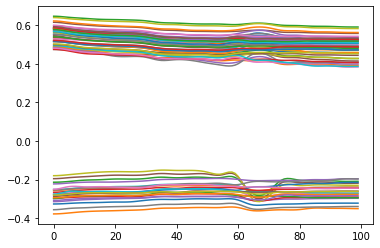


 ALL 66 channels of example #1, which has classID=12


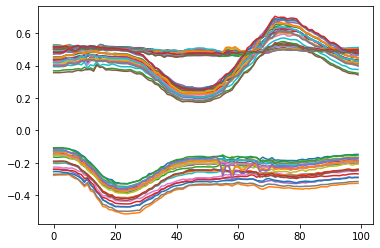

x(t),y(t) and z(t) for first joint of example #0


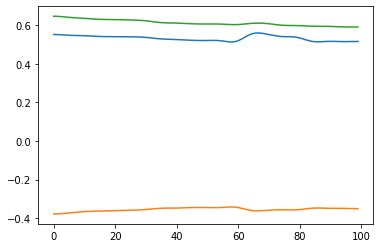

x(t),y(t) and z(t) for first joint of example #1


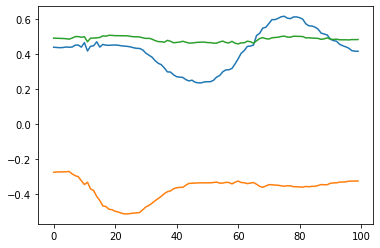

In [6]:
# Sanity check
import matplotlib.pyplot as plt
%matplotlib inline
print("x_train shape:"+str(x_train.shape))
print("x_test shape:"+str(x_test.shape))
print("\n ALL 66 channels of example #0, which has classID="+str(y_train_14[0]))
plt.plot(x_train[0])
plt.show()
print("\n ALL 66 channels of example #1, which has classID="+str(y_train_14[1]))
plt.plot(x_train[1])
plt.show()
joints = x_train[0].T
print("x(t),y(t) and z(t) for first joint of example #0")
plt.plot(joints[0])
plt.plot(joints[1])
plt.plot(joints[2])
plt.show()

print("x(t),y(t) and z(t) for first joint of example #1")
joints = x_train[1].T
plt.plot(joints[0])
plt.plot(joints[1])
plt.plot(joints[2])
plt.show()

In [7]:
# Transform the labels to one-hot encoding for the cross-entropy loss

from keras.utils import np_utils
y_train = y_train_14
y_test = y_test_14
y_train=[x-1 for x in y_train]
y_test=[x-1 for x in y_test]
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



In [8]:
# Flatten inputs
x_train_flat = numpy.zeros( (x_train.shape[0], x_train.shape[1]*x_train.shape[2]) )
for s in range(0,x_train.shape[0]):
    x_train_flat[s] = numpy.ravel(x_train[s])
print(x_train_flat[0])

x_test_flat = numpy.zeros( (x_test.shape[0], x_test.shape[1]*x_test.shape[2]) )
for s in range(0,x_test.shape[0]):
    x_test_flat[s] = numpy.ravel(x_test[s])
print(x_test_flat[0])



[ 0.5519968  -0.37839102  0.64684    ...  0.48855262 -0.28409763
  0.532519  ]
[ 0.25903072 -0.29799623  0.398353   ...  0.32711438 -0.19730906
  0.427744  ]


# II/ First we use a simple MLP using raw time-series as input

First we will do a test with a MLP using random parameters in order to know what hyperparameters are best fitted. 

Iteration 1, loss = 6.08318374
Validation score: 0.000000
Iteration 2, loss = 3.90245512
Validation score: 0.000000
Iteration 3, loss = 3.79119775
Validation score: 0.000000
Iteration 4, loss = 3.68074002
Validation score: 0.000000
Iteration 5, loss = 3.61827138
Validation score: 0.000000
Iteration 6, loss = 3.58182185
Validation score: 0.000000
Iteration 7, loss = 3.55951768
Validation score: 0.000000
Iteration 8, loss = 3.48033890
Validation score: 0.000000
Iteration 9, loss = 3.33347375
Validation score: 0.002551
Iteration 10, loss = 3.23939322
Validation score: 0.040816
Iteration 11, loss = 3.23606692
Validation score: 0.033163
Iteration 12, loss = 3.14431431
Validation score: 0.045918
Iteration 13, loss = 3.03782093
Validation score: 0.073980
Iteration 14, loss = 2.95229806
Validation score: 0.086735
Iteration 15, loss = 2.83842704
Validation score: 0.091837
Iteration 16, loss = 3.03517555
Validation score: 0.107143
Iteration 17, loss = 2.74958526
Validation score: 0.140306
Iterat

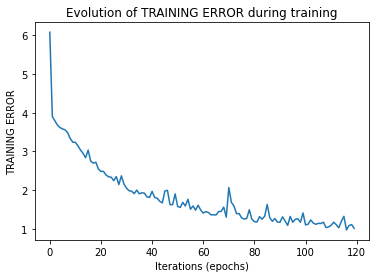

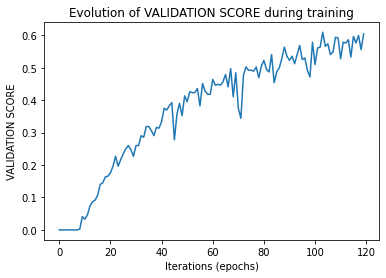

Training set score: 0.685714
Test set score: 0.623656
Detailed classification report (on TEST set):
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        58
           1       1.00      0.03      0.06        61
           2       0.82      0.25      0.39        55
           3       0.41      0.67      0.51        51
           4       0.81      0.84      0.82        55
           5       0.89      0.84      0.87        58
           6       0.90      0.92      0.91        62
           7       0.81      0.78      0.79        54
           8       0.95      0.79      0.86        68
           9       0.82      0.66      0.73        61
          10       0.98      0.64      0.77        69
          11       0.92      0.86      0.89        57
          12       0.98      0.88      0.93        58
          13       0.93      0.20      0.33        70

   micro avg       0.81      0.66      0.73       837
   macro avg       0.85      0.66 

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.neural_network import MLPClassifier



mlp = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=200, alpha=1e-3,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.01,n_iter_no_change=15,
                    early_stopping=True, validation_fraction=0.2)

mlp.fit(x_train_flat, y_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()
plt.title("Evolution of VALIDATION SCORE during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("VALIDATION SCORE")
plt.plot(mlp.validation_scores_)
plt.show()

print("Training set score: %f" % mlp.score(x_train_flat, y_train))

print("Test set score: %f" % mlp.score(x_test_flat, y_test))

y_pred = mlp.predict(x_test_flat)
from sklearn.metrics import classification_report
print("Detailed classification report (on TEST set):")
print(classification_report(y_test, y_pred))

## Essayons d'améliorer les résultats du MLP: 

**Pour se faire on va faire une cross validation grace à `GridSearchCV` présent dans sci kit learn**
> on va faire la grid search sur `hidden_layer_sizes`, `learning_rate_init`,`alpha`.  

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'hidden_layer_sizes': [ (30,30,),(35,35),(20,20)], 
   'learning_rate_init':[0.01,0.1,0.001],
   'alpha': [ 1e-4,1e-3]}
 ]

mlp=MLPClassifier(hidden_layer_sizes=(30,), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.01, n_iter_no_change=15,
                    early_stopping=True, validation_fraction=0.2)

clf =GridSearchCV(mlp, param_grid=param_grid,cv=3, scoring='accuracy') 


    
    
clf.fit(x_train_flat, y_train)





Iteration 1, loss = 6.93212022
Validation score: 0.000000
Iteration 2, loss = 4.02920121
Validation score: 0.000000
Iteration 3, loss = 3.80985077
Validation score: 0.000000
Iteration 4, loss = 3.76741109
Validation score: 0.000000
Iteration 5, loss = 3.84884456
Validation score: 0.000000
Iteration 6, loss = 3.63692637
Validation score: 0.000000
Iteration 7, loss = 3.60866518
Validation score: 0.000000
Iteration 8, loss = 3.55025905
Validation score: 0.000000
Iteration 9, loss = 3.53090420
Validation score: 0.000000
Iteration 10, loss = 3.51888513
Validation score: 0.000000
Iteration 11, loss = 3.44430733
Validation score: 0.007634
Iteration 12, loss = 3.44058324
Validation score: 0.000000
Iteration 13, loss = 3.29628327
Validation score: 0.007634
Iteration 14, loss = 3.26237149
Validation score: 0.015267
Iteration 15, loss = 3.13242882
Validation score: 0.030534
Iteration 16, loss = 3.26924570
Validation score: 0.003817
Iteration 17, loss = 3.09293282
Validation score: 0.003817
Iterat

Iteration 88, loss = 1.58321521
Validation score: 0.477099
Iteration 89, loss = 1.40845526
Validation score: 0.496183
Iteration 90, loss = 1.37876342
Validation score: 0.534351
Iteration 91, loss = 1.31269547
Validation score: 0.480916
Iteration 92, loss = 1.37159270
Validation score: 0.477099
Iteration 93, loss = 1.52091684
Validation score: 0.500000
Iteration 94, loss = 1.29652124
Validation score: 0.538168
Iteration 95, loss = 1.26236956
Validation score: 0.507634
Iteration 96, loss = 1.39198345
Validation score: 0.515267
Iteration 97, loss = 1.24516978
Validation score: 0.522901
Iteration 98, loss = 1.34671063
Validation score: 0.515267
Iteration 99, loss = 1.29005940
Validation score: 0.522901
Iteration 100, loss = 1.23930903
Validation score: 0.534351
Iteration 101, loss = 1.21147949
Validation score: 0.522901
Iteration 102, loss = 1.20143633
Validation score: 0.515267
Iteration 103, loss = 1.40874118
Validation score: 0.458015
Iteration 104, loss = 1.36996665
Validation score: 0

Iteration 1, loss = 92.36044865
Validation score: 0.000000
Iteration 2, loss = 32.71219416
Validation score: 0.000000
Iteration 3, loss = 23.03862439
Validation score: 0.000000
Iteration 4, loss = 20.08374603
Validation score: 0.000000
Iteration 5, loss = 21.86460650
Validation score: 0.000000
Iteration 6, loss = 23.08944963
Validation score: 0.000000
Iteration 7, loss = 23.79579946
Validation score: 0.000000
Iteration 8, loss = 24.14938751
Validation score: 0.000000
Iteration 9, loss = 24.34686572
Validation score: 0.000000
Iteration 10, loss = 24.45465117
Validation score: 0.000000
Iteration 11, loss = 24.50842353
Validation score: 0.000000
Iteration 12, loss = 24.53808561
Validation score: 0.000000
Iteration 13, loss = 24.55329931
Validation score: 0.000000
Iteration 14, loss = 24.56154885
Validation score: 0.000000
Iteration 15, loss = 24.56597451
Validation score: 0.000000
Iteration 16, loss = 24.56827116
Validation score: 0.000000
Iteration 17, loss = 24.56989355
Validation score

Iteration 49, loss = 1.81296156
Validation score: 0.374046
Iteration 50, loss = 1.92558771
Validation score: 0.404580
Iteration 51, loss = 1.69265749
Validation score: 0.416031
Iteration 52, loss = 1.75315694
Validation score: 0.358779
Iteration 53, loss = 1.98028784
Validation score: 0.400763
Iteration 54, loss = 1.96540415
Validation score: 0.312977
Iteration 55, loss = 2.01146952
Validation score: 0.385496
Iteration 56, loss = 1.69860706
Validation score: 0.416031
Iteration 57, loss = 1.61024077
Validation score: 0.431298
Iteration 58, loss = 1.65983483
Validation score: 0.404580
Iteration 59, loss = 1.68567634
Validation score: 0.446565
Iteration 60, loss = 1.91247543
Validation score: 0.473282
Iteration 61, loss = 1.69947799
Validation score: 0.419847
Iteration 62, loss = 1.57507389
Validation score: 0.461832
Iteration 63, loss = 1.55073249
Validation score: 0.473282
Iteration 64, loss = 1.57532228
Validation score: 0.503817
Iteration 65, loss = 1.56383954
Validation score: 0.4847

Iteration 57, loss = 1.56451244
Validation score: 0.396947
Iteration 58, loss = 1.47168164
Validation score: 0.347328
Iteration 59, loss = 1.79318717
Validation score: 0.389313
Iteration 60, loss = 1.41594625
Validation score: 0.351145
Iteration 61, loss = 1.80731572
Validation score: 0.343511
Iteration 62, loss = 1.58271512
Validation score: 0.404580
Iteration 63, loss = 1.39291186
Validation score: 0.385496
Iteration 64, loss = 1.55343806
Validation score: 0.370229
Iteration 65, loss = 1.53770755
Validation score: 0.435115
Iteration 66, loss = 1.38827684
Validation score: 0.458015
Iteration 67, loss = 1.38706662
Validation score: 0.427481
Iteration 68, loss = 1.36852325
Validation score: 0.393130
Iteration 69, loss = 1.43109961
Validation score: 0.427481
Iteration 70, loss = 1.34343660
Validation score: 0.423664
Iteration 71, loss = 1.38309080
Validation score: 0.461832
Iteration 72, loss = 1.30553034
Validation score: 0.450382
Iteration 73, loss = 1.35289798
Validation score: 0.3969

Iteration 31, loss = 2.32365439
Validation score: 0.229008
Iteration 32, loss = 2.28759964
Validation score: 0.209924
Iteration 33, loss = 2.27113221
Validation score: 0.270992
Iteration 34, loss = 2.24694671
Validation score: 0.259542
Iteration 35, loss = 2.09774212
Validation score: 0.236641
Iteration 36, loss = 2.11589898
Validation score: 0.240458
Iteration 37, loss = 2.06137225
Validation score: 0.171756
Iteration 38, loss = 2.13289321
Validation score: 0.270992
Iteration 39, loss = 2.19149420
Validation score: 0.267176
Iteration 40, loss = 2.16737217
Validation score: 0.221374
Iteration 41, loss = 2.74419593
Validation score: 0.301527
Iteration 42, loss = 2.01002177
Validation score: 0.290076
Iteration 43, loss = 1.89674059
Validation score: 0.324427
Iteration 44, loss = 1.83012085
Validation score: 0.202290
Iteration 45, loss = 2.33118226
Validation score: 0.385496
Iteration 46, loss = 1.96883683
Validation score: 0.320611
Iteration 47, loss = 1.83182033
Validation score: 0.3015

Iteration 15, loss = 3.64708758
Validation score: 0.000000
Iteration 16, loss = 3.64085602
Validation score: 0.000000
Iteration 17, loss = 3.63679819
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 15 consecutive epochs. Stopping.
Iteration 1, loss = 7.90401455
Validation score: 0.000000
Iteration 2, loss = 4.53398435
Validation score: 0.000000
Iteration 3, loss = 4.15136498
Validation score: 0.000000
Iteration 4, loss = 3.96735010
Validation score: 0.000000
Iteration 5, loss = 3.77863640
Validation score: 0.000000
Iteration 6, loss = 3.73395524
Validation score: 0.000000
Iteration 7, loss = 3.68659386
Validation score: 0.000000
Iteration 8, loss = 3.67079754
Validation score: 0.000000
Iteration 9, loss = 3.66311391
Validation score: 0.000000
Iteration 10, loss = 3.65419440
Validation score: 0.000000
Iteration 11, loss = 3.64653442
Validation score: 0.000000
Iteration 12, loss = 3.63971272
Validation score: 0.000000
Iteration 13, loss = 3.63366901

Iteration 64, loss = 2.34972312
Validation score: 0.183206
Iteration 65, loss = 2.92185358
Validation score: 0.225191
Iteration 66, loss = 2.15973831
Validation score: 0.263359
Iteration 67, loss = 2.04841711
Validation score: 0.259542
Iteration 68, loss = 2.04773152
Validation score: 0.248092
Iteration 69, loss = 2.16414489
Validation score: 0.259542
Iteration 70, loss = 2.13748601
Validation score: 0.259542
Iteration 71, loss = 2.09656853
Validation score: 0.255725
Iteration 72, loss = 2.07508028
Validation score: 0.236641
Iteration 73, loss = 2.13525832
Validation score: 0.263359
Iteration 74, loss = 2.07239712
Validation score: 0.274809
Iteration 75, loss = 2.09023646
Validation score: 0.309160
Iteration 76, loss = 2.05722169
Validation score: 0.232824
Iteration 77, loss = 2.58882457
Validation score: 0.225191
Iteration 78, loss = 2.23535350
Validation score: 0.206107
Iteration 79, loss = 2.16859562
Validation score: 0.274809
Iteration 80, loss = 2.14389372
Validation score: 0.2748

Iteration 16, loss = 3.68201403
Validation score: 0.000000
Iteration 17, loss = 3.67892295
Validation score: 0.000000
Iteration 18, loss = 3.67203566
Validation score: 0.000000
Iteration 19, loss = 3.66859123
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 15 consecutive epochs. Stopping.
Iteration 1, loss = 9.71152634
Validation score: 0.000000
Iteration 2, loss = 8.14783616
Validation score: 0.000000
Iteration 3, loss = 6.17011091
Validation score: 0.038168
Iteration 4, loss = 4.24905820
Validation score: 0.000000
Iteration 5, loss = 3.87093678
Validation score: 0.000000
Iteration 6, loss = 3.77281791
Validation score: 0.000000
Iteration 7, loss = 3.75744669
Validation score: 0.000000
Iteration 8, loss = 3.74946186
Validation score: 0.000000
Iteration 9, loss = 3.73620592
Validation score: 0.000000
Iteration 10, loss = 3.71967111
Validation score: 0.000000
Iteration 11, loss = 3.71220610
Validation score: 0.000000
Iteration 12, loss = 3.70187896

Iteration 97, loss = 1.40615984
Validation score: 0.465649
Iteration 98, loss = 1.37678732
Validation score: 0.511450
Iteration 99, loss = 1.31449994
Validation score: 0.465649
Iteration 100, loss = 1.43623760
Validation score: 0.404580
Iteration 101, loss = 1.55933356
Validation score: 0.370229
Iteration 102, loss = 1.52119894
Validation score: 0.549618
Iteration 103, loss = 1.31176698
Validation score: 0.484733
Iteration 104, loss = 1.32478632
Validation score: 0.435115
Iteration 105, loss = 1.72131995
Validation score: 0.492366
Iteration 106, loss = 1.32312735
Validation score: 0.496183
Iteration 107, loss = 1.33606009
Validation score: 0.500000
Iteration 108, loss = 1.30192462
Validation score: 0.507634
Iteration 109, loss = 1.28685498
Validation score: 0.526718
Iteration 110, loss = 1.27530727
Validation score: 0.515267
Iteration 111, loss = 1.59530532
Validation score: 0.347328
Iteration 112, loss = 1.83395696
Validation score: 0.480916
Iteration 113, loss = 1.33885087
Validation

Iteration 117, loss = 1.18772564
Validation score: 0.507634
Iteration 118, loss = 1.66306165
Validation score: 0.561069
Iteration 119, loss = 1.17183162
Validation score: 0.511450
Iteration 120, loss = 1.14676995
Validation score: 0.549618
Iteration 121, loss = 1.11414416
Validation score: 0.530534
Iteration 122, loss = 1.22489155
Validation score: 0.534351
Iteration 123, loss = 1.21704239
Validation score: 0.568702
Iteration 124, loss = 1.09752874
Validation score: 0.580153
Iteration 125, loss = 1.03862687
Validation score: 0.530534
Iteration 126, loss = 1.29191819
Validation score: 0.488550
Iteration 127, loss = 1.38356378
Validation score: 0.591603
Iteration 128, loss = 1.06599150
Validation score: 0.564885
Iteration 129, loss = 1.30001805
Validation score: 0.541985
Iteration 130, loss = 1.10174843
Validation score: 0.557252
Iteration 131, loss = 1.06335480
Validation score: 0.507634
Iteration 132, loss = 2.97679126
Validation score: 0.236641
Iteration 133, loss = 1.94494912
Validat

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.85656293
Validation score: 0.000000
Iteration 2, loss = 3.95702904
Validation score: 0.000000
Iteration 3, loss = 4.01639746
Validation score: 0.000000
Iteration 4, loss = 3.85235747
Validation score: 0.000000
Iteration 5, loss = 3.74717905
Validation score: 0.000000
Iteration 6, loss = 3.65575514
Validation score: 0.000000
Iteration 7, loss = 3.62382584
Validation score: 0.000000
Iteration 8, loss = 3.65049902
Validation score: 0.000000
Iteration 9, loss = 3.54977095
Validation score: 0.000000
Iteration 10, loss = 3.53698264
Validation score: 0.000000
Iteration 11, loss = 3.44249250
Validation score: 0.000000
Iteration 12, loss = 3.39050596
Validation score: 0.000000
Iteration 13, loss = 3.34596820
Validation score: 0.019084
Iteration 14, loss = 3.28975160
Validation score: 0.034351
Iteration 15, loss = 3.30270837
Validation score: 0.030534
Iteration 16, loss = 3.30962723
Validation score: 0.038168
Iteration 17, loss = 3.25152025
Validation score: 0.019084
Iterat

Iteration 140, loss = 1.62301374
Validation score: 0.553435
Iteration 141, loss = 1.16757855
Validation score: 0.526718
Iteration 142, loss = 1.13014689
Validation score: 0.561069
Iteration 143, loss = 1.01895335
Validation score: 0.541985
Iteration 144, loss = 1.02282235
Validation score: 0.587786
Iteration 145, loss = 0.99593146
Validation score: 0.572519
Iteration 146, loss = 1.01921313
Validation score: 0.595420
Iteration 147, loss = 0.91257367
Validation score: 0.610687
Iteration 148, loss = 0.96971864
Validation score: 0.530534
Iteration 149, loss = 1.11275685
Validation score: 0.587786
Iteration 150, loss = 0.90242326
Validation score: 0.576336
Iteration 151, loss = 1.16264457
Validation score: 0.625954
Iteration 152, loss = 0.94121326
Validation score: 0.610687
Iteration 153, loss = 1.02266708
Validation score: 0.648855
Iteration 154, loss = 0.91768559
Validation score: 0.606870
Iteration 155, loss = 1.03923959
Validation score: 0.583969
Iteration 156, loss = 0.99949591
Validat

Iteration 5, loss = 3.95434897
Validation score: 0.000000
Iteration 6, loss = 3.79494574
Validation score: 0.000000
Iteration 7, loss = 3.74588623
Validation score: 0.000000
Iteration 8, loss = 3.72057766
Validation score: 0.000000
Iteration 9, loss = 3.70970538
Validation score: 0.000000
Iteration 10, loss = 3.70116305
Validation score: 0.000000
Iteration 11, loss = 3.69241013
Validation score: 0.000000
Iteration 12, loss = 3.68771239
Validation score: 0.000000
Iteration 13, loss = 3.68423354
Validation score: 0.000000
Iteration 14, loss = 3.67926612
Validation score: 0.000000
Iteration 15, loss = 3.67506576
Validation score: 0.000000
Iteration 16, loss = 3.67131381
Validation score: 0.000000
Iteration 17, loss = 3.66667706
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 15 consecutive epochs. Stopping.
Iteration 1, loss = 6.24337604
Validation score: 0.000000
Iteration 2, loss = 3.89179761
Validation score: 0.000000
Iteration 3, loss = 3.7596575

Iteration 17, loss = 2.87695186
Validation score: 0.053435
Iteration 18, loss = 2.89956766
Validation score: 0.041985
Iteration 19, loss = 2.85819127
Validation score: 0.114504
Iteration 20, loss = 2.83211254
Validation score: 0.095420
Iteration 21, loss = 2.71490098
Validation score: 0.110687
Iteration 22, loss = 2.61033825
Validation score: 0.141221
Iteration 23, loss = 2.55877056
Validation score: 0.141221
Iteration 24, loss = 2.62218116
Validation score: 0.190840
Iteration 25, loss = 2.44737717
Validation score: 0.202290
Iteration 26, loss = 2.90502670
Validation score: 0.125954
Iteration 27, loss = 2.48491268
Validation score: 0.183206
Iteration 28, loss = 2.37342252
Validation score: 0.225191
Iteration 29, loss = 2.28420692
Validation score: 0.190840
Iteration 30, loss = 2.21344174
Validation score: 0.255725
Iteration 31, loss = 2.23405629
Validation score: 0.225191
Iteration 32, loss = 2.12512038
Validation score: 0.251908
Iteration 33, loss = 2.06985709
Validation score: 0.2519

Iteration 155, loss = 0.84808989
Validation score: 0.465649
Iteration 156, loss = 1.50548814
Validation score: 0.511450
Iteration 157, loss = 0.88740417
Validation score: 0.564885
Iteration 158, loss = 1.28433202
Validation score: 0.587786
Iteration 159, loss = 0.88639991
Validation score: 0.484733
Iteration 160, loss = 1.20181098
Validation score: 0.614504
Iteration 161, loss = 0.86336488
Validation score: 0.606870
Iteration 162, loss = 0.83510538
Validation score: 0.580153
Iteration 163, loss = 0.83215745
Validation score: 0.603053
Iteration 164, loss = 0.81931825
Validation score: 0.557252
Iteration 165, loss = 0.82285711
Validation score: 0.591603
Iteration 166, loss = 0.82343566
Validation score: 0.545802
Iteration 167, loss = 0.92731523
Validation score: 0.606870
Iteration 168, loss = 0.87719174
Validation score: 0.465649
Iteration 169, loss = 1.13625115
Validation score: 0.488550
Iteration 170, loss = 0.95571847
Validation score: 0.503817
Validation score did not improve more th

Iteration 122, loss = 1.02178734
Validation score: 0.511450
Iteration 123, loss = 1.03371396
Validation score: 0.496183
Iteration 124, loss = 1.19290026
Validation score: 0.515267
Iteration 125, loss = 1.06494279
Validation score: 0.473282
Iteration 126, loss = 1.76375489
Validation score: 0.522901
Iteration 127, loss = 1.07388016
Validation score: 0.530534
Iteration 128, loss = 1.03396523
Validation score: 0.519084
Iteration 129, loss = 1.08894050
Validation score: 0.549618
Iteration 130, loss = 0.94085317
Validation score: 0.553435
Iteration 131, loss = 0.95783514
Validation score: 0.553435
Iteration 132, loss = 1.00492602
Validation score: 0.454198
Iteration 133, loss = 1.91565804
Validation score: 0.469466
Iteration 134, loss = 1.26350204
Validation score: 0.564885
Validation score did not improve more than tol=0.000100 for 15 consecutive epochs. Stopping.
Iteration 1, loss = 99.34139997
Validation score: 0.000000
Iteration 2, loss = 5.20443912
Validation score: 0.000000
Iteration 

Iteration 15, loss = 3.34873713
Validation score: 0.000000
Iteration 16, loss = 3.33739320
Validation score: 0.000000
Iteration 17, loss = 3.49441486
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 15 consecutive epochs. Stopping.
Iteration 1, loss = 8.45486499
Validation score: 0.000000
Iteration 2, loss = 3.97689911
Validation score: 0.000000
Iteration 3, loss = 3.85934889
Validation score: 0.000000
Iteration 4, loss = 3.74818628
Validation score: 0.000000
Iteration 5, loss = 3.66791975
Validation score: 0.000000
Iteration 6, loss = 3.64374588
Validation score: 0.000000
Iteration 7, loss = 3.64028346
Validation score: 0.000000
Iteration 8, loss = 3.59867862
Validation score: 0.000000
Iteration 9, loss = 3.59166560
Validation score: 0.000000
Iteration 10, loss = 3.56149494
Validation score: 0.000000
Iteration 11, loss = 3.55224342
Validation score: 0.000000
Iteration 12, loss = 3.51962474
Validation score: 0.000000
Iteration 13, loss = 3.46794399

Iteration 4, loss = 4.30044425
Validation score: 0.000000
Iteration 5, loss = 4.13951727
Validation score: 0.000000
Iteration 6, loss = 4.10548682
Validation score: 0.000000
Iteration 7, loss = 4.11303668
Validation score: 0.000000
Iteration 8, loss = 4.12046105
Validation score: 0.000000
Iteration 9, loss = 4.12330510
Validation score: 0.000000
Iteration 10, loss = 4.12378692
Validation score: 0.000000
Iteration 11, loss = 4.12377850
Validation score: 0.000000
Iteration 12, loss = 4.12449324
Validation score: 0.000000
Iteration 13, loss = 4.12594496
Validation score: 0.000000
Iteration 14, loss = 4.12599740
Validation score: 0.000000
Iteration 15, loss = 4.12547833
Validation score: 0.000000
Iteration 16, loss = 4.12583757
Validation score: 0.000000
Iteration 17, loss = 4.12564660
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 15 consecutive epochs. Stopping.
Iteration 1, loss = 40.06136772
Validation score: 0.000000
Iteration 2, loss = 4.962869

Iteration 29, loss = 2.36942031
Validation score: 0.247449
Iteration 30, loss = 2.15604607
Validation score: 0.227041
Iteration 31, loss = 2.05177568
Validation score: 0.260204
Iteration 32, loss = 1.98352630
Validation score: 0.260204
Iteration 33, loss = 1.97239214
Validation score: 0.290816
Iteration 34, loss = 1.90819855
Validation score: 0.285714
Iteration 35, loss = 2.00039557
Validation score: 0.318878
Iteration 36, loss = 1.90497681
Validation score: 0.318878
Iteration 37, loss = 1.93127623
Validation score: 0.306122
Iteration 38, loss = 1.92212864
Validation score: 0.290816
Iteration 39, loss = 1.82273786
Validation score: 0.316327
Iteration 40, loss = 1.81164610
Validation score: 0.313776
Iteration 41, loss = 1.96761094
Validation score: 0.334184
Iteration 42, loss = 1.81097864
Validation score: 0.375000
Iteration 43, loss = 1.78979583
Validation score: 0.369898
Iteration 44, loss = 1.71021656
Validation score: 0.382653
Iteration 45, loss = 1.67042783
Validation score: 0.3928

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True,
                                     hidden_layer_sizes=(30,),
                                     learning_rate_init=0.01,
                                     n_iter_no_change=15, random_state=1,
                                     solver='sgd', validation_fraction=0.2,
                                     verbose=10),
             param_grid=[{'alpha': [0.0001, 0.001],
                          'hidden_layer_sizes': [(30, 30), (35, 35), (20, 20)],
                          'learning_rate_init': [0.01, 0.1, 0.001]}],
             scoring='accuracy')

## **La grid search a été faite, on va vérifier quelles sont les meilleurs paramètres puis plot les résultats !** 

In [11]:


print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()




Best parameters set found on development set:

{'alpha': 0.001, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.01}

Grid scores on development set:

0.416 (+/-0.290) for {'alpha': 0.0001, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.01}
0.000 (+/-0.000) for {'alpha': 0.0001, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.1}
0.000 (+/-0.000) for {'alpha': 0.0001, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.001}
0.624 (+/-0.100) for {'alpha': 0.0001, 'hidden_layer_sizes': (35, 35), 'learning_rate_init': 0.01}
0.000 (+/-0.000) for {'alpha': 0.0001, 'hidden_layer_sizes': (35, 35), 'learning_rate_init': 0.1}
0.004 (+/-0.004) for {'alpha': 0.0001, 'hidden_layer_sizes': (35, 35), 'learning_rate_init': 0.001}
0.143 (+/-0.406) for {'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.01}
0.017 (+/-0.049) for {'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.1}
0.006 (+/-0.016) for {'alpha': 0.0001, 'hidden_laye

## **This cell told us what the best parameters were and what the validation score was for this set of hyperparameters**
* Best parameters set found on development set:
  {'alpha': 0.0001, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.01}

* validation score: 0.658163

## Essayons de plot les différents résultats ! 
> pour se faire on va d'abord calculer l'accuracy, puis la matrice de confusion. 


In [12]:



# Evaluate acuracy on test data
score = clf.score(x_test_flat,y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(x_test_flat)
print(classification_report(y_true, y_pred))





Acuracy (on test set) =  0.6236559139784946
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        58
           1       1.00      0.03      0.06        61
           2       0.82      0.25      0.39        55
           3       0.41      0.67      0.51        51
           4       0.81      0.84      0.82        55
           5       0.89      0.84      0.87        58
           6       0.90      0.92      0.91        62
           7       0.81      0.78      0.79        54
           8       0.95      0.79      0.86        68
           9       0.82      0.66      0.73        61
          10       0.98      0.64      0.77        69
          11       0.92      0.86      0.89        57
          12       0.98      0.88      0.93        58
          13       0.93      0.20      0.33        70

   micro avg       0.81      0.66      0.73       837
   macro avg       0.85      0.66      0.69       837
weighted avg       0.86      0.66   

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On connait déjà les meilleurs paramètres: 
>{'alpha': 0.0001, 'hidden_layer_sizes': (35, 35), 'learning_rate_init': 0.01}

## **On va pouvoir plot la learning curve pour ces paramètres !**


In [ ]:
print(clf.best_params_)

Iteration 1, loss = 6.08318374
Validation score: 0.000000
Iteration 2, loss = 3.90245512
Validation score: 0.000000
Iteration 3, loss = 3.79119775
Validation score: 0.000000
Iteration 4, loss = 3.68074002
Validation score: 0.000000
Iteration 5, loss = 3.61827138
Validation score: 0.000000
Iteration 6, loss = 3.58182185
Validation score: 0.000000
Iteration 7, loss = 3.55951768
Validation score: 0.000000
Iteration 8, loss = 3.48033890
Validation score: 0.000000
Iteration 9, loss = 3.33347375
Validation score: 0.002551
Iteration 10, loss = 3.23939322
Validation score: 0.040816
Iteration 11, loss = 3.23606692
Validation score: 0.033163
Iteration 12, loss = 3.14431431
Validation score: 0.045918
Iteration 13, loss = 3.03782093
Validation score: 0.073980
Iteration 14, loss = 2.95229806
Validation score: 0.086735
Iteration 15, loss = 2.83842704
Validation score: 0.091837
Iteration 16, loss = 3.03517555
Validation score: 0.107143
Iteration 17, loss = 2.74958526
Validation score: 0.140306
Iterat

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


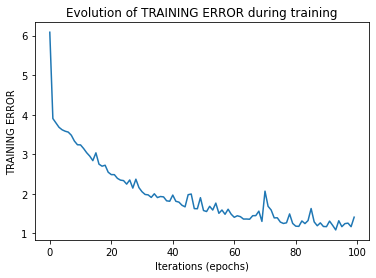

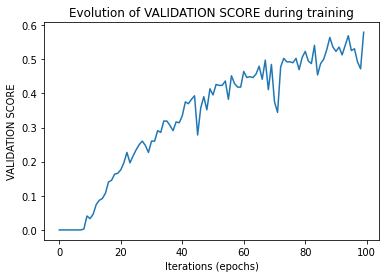

Training set score: 0.643367
Test set score: 0.586619
Detailed classification report (on TEST set):
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        58
           1       0.71      0.08      0.15        61
           2       0.72      0.38      0.50        55
           3       0.30      0.78      0.44        51
           4       0.82      0.75      0.78        55
           5       1.00      0.26      0.41        58
           6       0.90      0.92      0.91        62
           7       0.84      0.69      0.76        54
           8       1.00      0.65      0.79        68
           9       0.84      0.69      0.76        61
          10       0.98      0.68      0.80        69
          11       0.90      0.82      0.86        57
          12       1.00      0.84      0.92        58
          13       0.73      0.39      0.50        70

   micro avg       0.76      0.63      0.69       837
   macro avg       0.82      0.63 

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


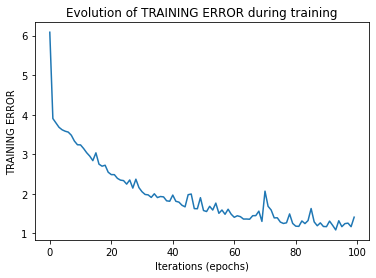

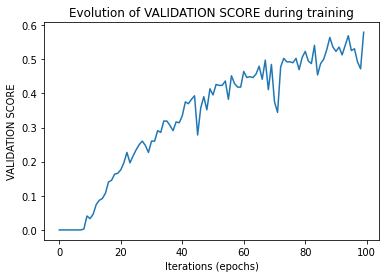

Training set score: 0.643367
Test set score: 0.586619
Detailed classification report (on TEST set):
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        58
           1       0.71      0.08      0.15        61
           2       0.72      0.38      0.50        55
           3       0.30      0.78      0.44        51
           4       0.82      0.75      0.78        55
           5       1.00      0.26      0.41        58
           6       0.90      0.92      0.91        62
           7       0.84      0.69      0.76        54
           8       1.00      0.65      0.79        68
           9       0.84      0.69      0.76        61
          10       0.98      0.68      0.80        69
          11       0.90      0.82      0.86        57
          12       1.00      0.84      0.92        58
          13       0.73      0.39      0.50        70

   micro avg       0.76      0.63      0.69       837
   macro avg       0.82      0.63 

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# On va plot la fonction de perte et de validation pour les meilleurs paramètres trouvé lors de la grid search. 

#Plot the results
# Plot the LEARNING CURVE
from sklearn.neural_network import MLPClassifier
best_params=clf.best_params_
alpha=best_params['alpha']
hidden_layer_sizes=best_params['hidden_layer_sizes']
learning_rate_init=best_params['learning_rate_init']

mlp=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=100, 
                  alpha=alpha,solver='sgd', verbose=10, tol=1e-4, 
                  random_state=1,learning_rate_init=learning_rate_init,
                  n_iter_no_change=15,early_stopping=True, validation_fraction=0.2)
mlp.fit(x_train_flat, y_train)


# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()
plt.title("Evolution of VALIDATION SCORE during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("VALIDATION SCORE")
plt.plot(mlp.validation_scores_)
plt.show()

print("Training set score: %f" % mlp.score(x_train_flat, y_train))

print("Test set score: %f" % mlp.score(x_test_flat, y_test))

y_pred = mlp.predict(x_test_flat)
from sklearn.metrics import classification_report
print("Detailed classification report (on TEST set):")
print(classification_report(y_test, y_pred))


plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()
plt.title("Evolution of VALIDATION SCORE during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("VALIDATION SCORE")
plt.plot(mlp.validation_scores_)
plt.show()

print("Training set score: %f" % mlp.score(x_train_flat, y_train))

print("Test set score: %f" % mlp.score(x_test_flat, y_test))

y_pred = mlp.predict(x_test_flat)
from sklearn.metrics import classification_report
print("Detailed classification report (on TEST set):")
print(classification_report(y_test, y_pred))



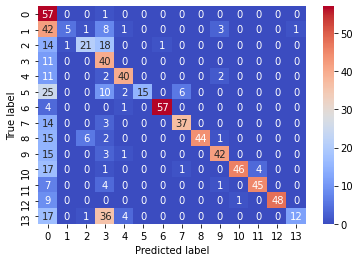

In [14]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_true=y_test.argmax(axis=1), y_pred=y_pred.argmax(axis=1))
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()





on observe que les positions 1 et 2 qui correspondent à grab et tap semblent être souvent confondu, pareil pour les positions 12 et 11 qui correspondent à swipe x et swipe +. 


## on va essayer de plot la average precision score

In [ ]:
#plot the average_precision score
# For each class
precision = dict()
n_classes=y_test.shape[1]
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    score.ravel())
average_precision["micro"] = average_precision_score(y_test, score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

#plot the curve: 
from sklearn.metrics import precision_recall_curve
import seaborn as sns
precision, recall, thresholds = metrics.precision_recall_curve(y_true=y_test.argmax(axis=1), probas_pred=y_pred.argmax(axis=1))
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()





# III/ Trying RNN with raw time-series input in order to improve the results

we will try to implement a LSTM Recurrent Neural Network, as the data are time-series it could be easier and thus we could have better result. 

In [ ]:
y_train.argmax(axis=1).shape

In [ ]:
x_train.shape

In [15]:
import tensorflow as tf
import tensorflow.keras as tfk

print('Your tensorflow version: {}'.format(tf.__version__))
print("GPU : "+tf.test.gpu_device_name())

# Create the model architecture
model = tfk.Sequential()
nbUnits = 16
lengthTimeseries = x_train[0].shape[0]
nbTimeseries = x_train[0].shape[1]
nbClasses=16
length = lengthTimeseries
model.add(tfk.layers.LSTM(units=nbUnits, activation='tanh',input_shape=(lengthTimeseries,nbTimeseries)))
model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
model.summary()


# Train the model 
optim = tfk.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy']) 
earlyStop = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history=model.fit(x_train, y_train.argmax(axis=1), validation_split=0.3, batch_size=256, 
                  epochs=200, callbacks=[earlyStop])





Your tensorflow version: 2.3.1
GPU : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                5312      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 1s 212ms/step - loss: 2.7162 - accuracy: 0.0700 - val_loss: 2.6724 - val_accuracy: 0.0765
Epoch 2/200
6/6 [==============================] - 1s 115ms/step - loss: 2.6393 - accuracy: 0.0860 - val_loss: 2.6153 - val_accuracy: 0.0816
Epoch 3/200
6/6 [==============================] - 1s 114ms/step - loss: 2.5898 - accuracy: 0.1050 - val_loss: 2.6363 - val_accuracy: 0.0935
Epoch 4/200
6/6 [==============================] - 1s 1

6/6 [==============================] - 0s 73ms/step - loss: 0.5496 - accuracy: 0.8163 - val_loss: 0.8565 - val_accuracy: 0.7364
Epoch 113/200
6/6 [==============================] - 0s 82ms/step - loss: 0.5484 - accuracy: 0.8265 - val_loss: 1.0086 - val_accuracy: 0.6888
Epoch 114/200
6/6 [==============================] - 1s 100ms/step - loss: 0.5990 - accuracy: 0.8163 - val_loss: 0.8365 - val_accuracy: 0.7398
Epoch 115/200
6/6 [==============================] - 1s 105ms/step - loss: 0.5451 - accuracy: 0.8222 - val_loss: 0.8088 - val_accuracy: 0.7500
Epoch 116/200
6/6 [==============================] - 1s 103ms/step - loss: 0.4937 - accuracy: 0.8462 - val_loss: 0.7338 - val_accuracy: 0.7670
Epoch 117/200
6/6 [==============================] - 1s 94ms/step - loss: 0.4955 - accuracy: 0.8426 - val_loss: 0.7794 - val_accuracy: 0.7653
Epoch 118/200
6/6 [==============================] - 1s 138ms/step - loss: 0.5364 - accuracy: 0.8360 - val_loss: 0.7759 - val_accuracy: 0.7483
Epoch 119/200
6/

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.64      0.81      0.72        58
           1       0.45      0.33      0.38        61
           2       0.62      0.71      0.66        55
           3       0.65      0.63      0.64        51
           4       0.70      0.73      0.71        55
           5       0.88      0.78      0.83        58
           6       0.89      0.81      0.85        62
           7       0.82      0.78      0.80        54
           8       0.94      0.49      0.64        68
           9       0.69      0.89      0.78        61
          10       0.84      0.81      0.82        69
          11       0.65      0.84      0.73        57
          12       0.75      0.97      0.84        58
          13       0.64      0.59      0.61        70

    accuracy                           0.72       837
   macro avg       0.73      0.72      0.72       837
weighted avg       0.73      0.72      0.71       8

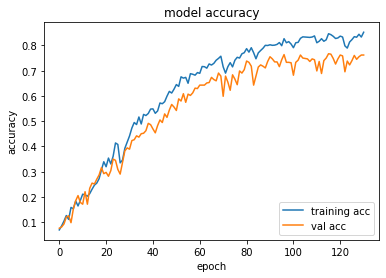

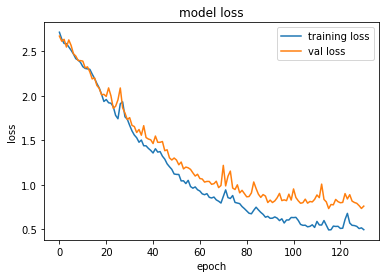

In [16]:
#display score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

fig = plt.figure()
plt.plot(history.history['accuracy'],label='training acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

fig = plt.figure()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

## On va faire une gross validation pour essayer de trouver de meilleurs résultats 

 We will do the gridsearch on LSTM units and the learning_rate ! 

In [17]:
params_grid = {'nbUnits': [16, 32],
               'learning_rate': [ 0.001, 0.01]}

from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def create_rnn(nbUnits = 16, learning_rate = 0.001):
    # Create the model architecture
    #model = tfk.Sequential()
    #length = lengthTimeseries
    #model.add(tfk.layers.LSTM(units=nbUnits, activation='tanh',input_shape=(lengthTimeseries,nbTimeseries)))
    #model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
    #model.summary()
    model = tfk.Sequential()
    nbUnits = 16
    lengthTimeseries = x_train[0].shape[0]
    nbTimeseries = x_train[0].shape[1]
    nbClasses=16
    length = lengthTimeseries
    model.add(tfk.layers.LSTM(units=nbUnits, activation='tanh',input_shape=(lengthTimeseries,nbTimeseries)))
    model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
    model.summary()
    
    # Train the model 
    optim = tfk.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy']) 
    return model



model = KerasClassifier(build_fn=create_rnn, epochs=200, batch_size=256, validation_split = 0.3)

clf_best = GridSearchCV(model, param_grid = params_grid, cv = 3, scoring = 'accuracy')
earlyStop = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=5)
clf_best.fit(x_train, y_train.argmax(axis=1), epochs = 200, batch_size = 256,
             callbacks = [earlyStop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                5312      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 1s 310ms/step - loss: 2.7788 - accuracy: 0.0733 - val_loss: 2.7505 - val_accuracy: 0.0791
Epoch 2/200
4/4 [==============================] - 0s 81ms/step - loss: 2.7366 - accuracy: 0.0689 - val_loss: 2.7229 - val_accuracy: 0.0714
Epoch 3/200
4/4 [==============================] - 0s 84ms/step - loss: 2.7132 - accuracy: 0.0821 - val_loss: 2.7091 - val_accuracy: 0.0612
Epoch 4/200
4/4 [==============================] - 0s 81ms/step - loss: 2.6963 - accuracy: 0.

4/4 [==============================] - 0s 70ms/step - loss: 2.6301 - accuracy: 0.0744 - val_loss: 2.6600 - val_accuracy: 0.0712
Epoch 17/200
4/4 [==============================] - 0s 79ms/step - loss: 2.6206 - accuracy: 0.0821 - val_loss: 2.6426 - val_accuracy: 0.0738
Epoch 18/200
4/4 [==============================] - 0s 69ms/step - loss: 2.6195 - accuracy: 0.0985 - val_loss: 2.6510 - val_accuracy: 0.0967
Epoch 19/200
4/4 [==============================] - 0s 69ms/step - loss: 2.6081 - accuracy: 0.0886 - val_loss: 2.6496 - val_accuracy: 0.0992
Epoch 20/200
4/4 [==============================] - 0s 68ms/step - loss: 2.6041 - accuracy: 0.0985 - val_loss: 2.6137 - val_accuracy: 0.1145
Epoch 21/200
4/4 [==============================] - 0s 73ms/step - loss: 2.5951 - accuracy: 0.1236 - val_loss: 2.6055 - val_accuracy: 0.1221
Epoch 22/200
4/4 [==============================] - 0s 71ms/step - loss: 2.5807 - accuracy: 0.1225 - val_loss: 2.6079 - val_accuracy: 0.1247
Epoch 23/200
4/4 [========

Epoch 12/200
4/4 [==============================] - 0s 69ms/step - loss: 2.6234 - accuracy: 0.1182 - val_loss: 2.6409 - val_accuracy: 0.0865
Epoch 13/200
4/4 [==============================] - 0s 71ms/step - loss: 2.6100 - accuracy: 0.1138 - val_loss: 2.6323 - val_accuracy: 0.0891
Epoch 14/200
4/4 [==============================] - 0s 68ms/step - loss: 2.5992 - accuracy: 0.1039 - val_loss: 2.6231 - val_accuracy: 0.0891
Epoch 15/200
4/4 [==============================] - 0s 68ms/step - loss: 2.5868 - accuracy: 0.1193 - val_loss: 2.6167 - val_accuracy: 0.1196
Epoch 16/200
4/4 [==============================] - 0s 72ms/step - loss: 2.5722 - accuracy: 0.1422 - val_loss: 2.5996 - val_accuracy: 0.1069
Epoch 17/200
4/4 [==============================] - 0s 73ms/step - loss: 2.5511 - accuracy: 0.1499 - val_loss: 2.5683 - val_accuracy: 0.1221
Epoch 18/200
4/4 [==============================] - 0s 71ms/step - loss: 2.5317 - accuracy: 0.1630 - val_loss: 2.5753 - val_accuracy: 0.1272
Epoch 19/200


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 16)                5312      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 1s 212ms/step - loss: 2.7618 - accuracy: 0.0788 - val_loss: 2.7471 - val_accuracy: 0.0763
Epoch 2/200
4/4 [==============================] - 0s 72ms/step - loss: 2.7402 - accuracy: 0.0853 - val_loss: 2.7379 - val_accuracy: 0.0712
Epoch 3/200
4/4 [==============================] - 0s 71ms/step - loss: 2.7265 - accuracy: 0.0810 - val_loss: 2.7307 - val_accuracy: 0.0712
Epoch 4/200
4/4 [==============================] - 0s 71ms/step - loss: 2.7157 - accuracy: 0.

Epoch 55/200
4/4 [==============================] - 0s 74ms/step - loss: 2.2402 - accuracy: 0.2921 - val_loss: 2.3548 - val_accuracy: 0.2290
Epoch 56/200
4/4 [==============================] - 0s 72ms/step - loss: 2.1746 - accuracy: 0.3009 - val_loss: 2.3103 - val_accuracy: 0.2417
Epoch 57/200
4/4 [==============================] - 0s 69ms/step - loss: 2.1497 - accuracy: 0.3151 - val_loss: 2.3727 - val_accuracy: 0.2545
Epoch 58/200
4/4 [==============================] - 0s 71ms/step - loss: 2.1726 - accuracy: 0.3173 - val_loss: 2.3098 - val_accuracy: 0.2646
Epoch 59/200
4/4 [==============================] - 0s 70ms/step - loss: 2.1334 - accuracy: 0.3425 - val_loss: 2.3021 - val_accuracy: 0.2519
Epoch 60/200
4/4 [==============================] - 0s 71ms/step - loss: 2.1640 - accuracy: 0.3085 - val_loss: 2.2774 - val_accuracy: 0.2468
Epoch 61/200
4/4 [==============================] - 0s 72ms/step - loss: 2.1381 - accuracy: 0.3249 - val_loss: 2.2498 - val_accuracy: 0.2824
Epoch 62/200


4/4 [==============================] - 0s 73ms/step - loss: 1.2850 - accuracy: 0.5875 - val_loss: 1.5454 - val_accuracy: 0.4949
Epoch 48/200
4/4 [==============================] - 0s 73ms/step - loss: 1.3187 - accuracy: 0.5853 - val_loss: 1.4294 - val_accuracy: 0.5281
Epoch 49/200
4/4 [==============================] - 0s 74ms/step - loss: 1.3017 - accuracy: 0.5864 - val_loss: 1.5543 - val_accuracy: 0.4694
Epoch 50/200
4/4 [==============================] - 0s 71ms/step - loss: 1.2833 - accuracy: 0.5755 - val_loss: 1.3566 - val_accuracy: 0.5332
Epoch 51/200
4/4 [==============================] - 0s 74ms/step - loss: 1.2013 - accuracy: 0.6105 - val_loss: 1.3539 - val_accuracy: 0.5434
Epoch 52/200
4/4 [==============================] - 0s 106ms/step - loss: 1.1940 - accuracy: 0.6193 - val_loss: 1.3501 - val_accuracy: 0.5332
Epoch 53/200
4/4 [==============================] - 0s 70ms/step - loss: 1.1669 - accuracy: 0.6247 - val_loss: 1.3065 - val_accuracy: 0.5969
Epoch 54/200
4/4 [=======

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 16)                5312      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 1s 217ms/step - loss: 2.7872 - accuracy: 0.0777 - val_loss: 2.7292 - val_accuracy: 0.0587
Epoch 2/200
4/4 [==============================] - 0s 70ms/step - loss: 2.7180 - accuracy: 0.0678 - val_loss: 2.7090 - val_accuracy: 0.0714
Epoch 3/200
4/4 [==============================] - 0s 74ms/step - loss: 2.6924 - accuracy: 0.0821 - val_loss: 2.6943 - val_accuracy: 0.0689
Epoch 4/200
4/4 [==============================] - 0s 71ms/step - loss: 2.6710 - accuracy: 0

Epoch 55/200
4/4 [==============================] - 0s 75ms/step - loss: 1.4429 - accuracy: 0.5219 - val_loss: 1.5827 - val_accuracy: 0.4362
Epoch 56/200
4/4 [==============================] - 0s 72ms/step - loss: 1.4371 - accuracy: 0.5328 - val_loss: 1.6444 - val_accuracy: 0.4668
Epoch 57/200
4/4 [==============================] - 0s 73ms/step - loss: 1.4442 - accuracy: 0.5306 - val_loss: 1.5715 - val_accuracy: 0.4260
Epoch 58/200
4/4 [==============================] - 0s 74ms/step - loss: 1.4623 - accuracy: 0.5109 - val_loss: 1.6363 - val_accuracy: 0.4286
Epoch 59/200
4/4 [==============================] - 0s 72ms/step - loss: 1.4546 - accuracy: 0.5098 - val_loss: 1.4666 - val_accuracy: 0.4923
Epoch 60/200
4/4 [==============================] - 0s 74ms/step - loss: 1.3628 - accuracy: 0.5525 - val_loss: 1.4790 - val_accuracy: 0.5051
Epoch 61/200
4/4 [==============================] - 0s 70ms/step - loss: 1.3324 - accuracy: 0.5755 - val_loss: 1.4654 - val_accuracy: 0.5128
Epoch 62/200


4/4 [==============================] - 0s 72ms/step - loss: 1.7691 - accuracy: 0.3742 - val_loss: 1.7545 - val_accuracy: 0.3639
Epoch 41/200
4/4 [==============================] - 0s 74ms/step - loss: 1.6957 - accuracy: 0.4026 - val_loss: 1.8147 - val_accuracy: 0.3588
Epoch 42/200
4/4 [==============================] - 0s 72ms/step - loss: 1.7668 - accuracy: 0.3523 - val_loss: 1.7965 - val_accuracy: 0.3384
Epoch 43/200
4/4 [==============================] - 0s 72ms/step - loss: 1.7096 - accuracy: 0.3873 - val_loss: 1.8294 - val_accuracy: 0.3511
Epoch 44/200
4/4 [==============================] - 0s 73ms/step - loss: 1.6589 - accuracy: 0.4300 - val_loss: 1.7383 - val_accuracy: 0.3740
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 16)                5312      
_________________________________________________________________
dense_13 (Dense)     

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe9a9f52130>,
             param_grid={'learning_rate': [0.001, 0.01], 'nbUnits': [16, 32]},
             scoring='accuracy')

In [18]:
#find the best result of the grid search: 
print("Best parameters set found on development set:")
print()
print(clf_best.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_best.cv_results_['mean_test_score']
stds = clf_best.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_best.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()



Best parameters set found on development set:

{'learning_rate': 0.01, 'nbUnits': 32}

Grid scores on development set:

0.216 (+/-0.136) for {'learning_rate': 0.001, 'nbUnits': 16}
0.232 (+/-0.064) for {'learning_rate': 0.001, 'nbUnits': 32}
0.393 (+/-0.495) for {'learning_rate': 0.01, 'nbUnits': 16}
0.428 (+/-0.211) for {'learning_rate': 0.01, 'nbUnits': 32}



## On a trouvé les meilleurs paramètres 

We have found the best parameters set on development set thanks to the grid search,
* parameters:{'learning_rate': 0.01, 'nbUnits': 16}
* validation score: 

In [19]:

# Evaluate acuracy on test data
score = clf_best.score(x_test,y_test.argmax(axis=1))
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test.argmax(axis=1), clf_best.predict(x_test)
print(classification_report(y_true, y_pred))



Acuracy (on test set) =  0.5364396654719236
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        58
           1       0.31      0.18      0.23        61
           2       0.31      0.33      0.32        55
           3       0.18      0.59      0.27        51
           4       0.75      0.55      0.63        55
           5       0.36      0.66      0.46        58
           6       0.96      0.89      0.92        62
           7       0.58      0.70      0.64        54
           8       0.93      0.54      0.69        68
           9       0.64      0.48      0.55        61
          10       0.88      0.64      0.74        69
          11       0.66      0.61      0.64        57
          12       0.84      0.81      0.82        58
          13       0.33      0.01      0.03        70

    accuracy                           0.54       837
   macro avg       0.60      0.54      0.54       837
weighted avg       0.61      0.54   

## Maintenant on va plot la matrice de confusion pour comprendre quelle classe sont confondus ! 

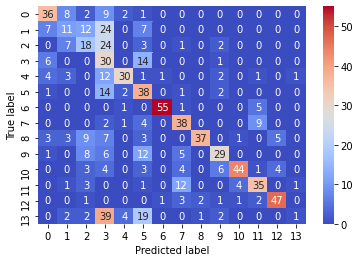

In [20]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_true,y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

## Maintenant on va plot la loss curve pour la validation et et le test set ! 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 16)                5312      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 1s 209ms/step - loss: 2.7689 - accuracy: 0.0671 - val_loss: 2.7240 - val_accuracy: 0.0629
Epoch 2/200
6/6 [==============================] - 1s 89ms/step - loss: 2.6971 - accuracy: 0.0809 - val_loss: 2.6799 - val_accuracy: 0.0646
Epoch 3/200
6/6 [==============================] - 1s 109ms/step - loss: 2.6535 - accuracy: 0.0962 - val_loss: 2.6427 - val_accuracy: 0.0935
Epoch 4/200
6/6 [==============================] - 1s 90ms/step - loss: 2.6224 - accuracy: 

6/6 [==============================] - 0s 72ms/step - loss: 0.4657 - accuracy: 0.8462 - val_loss: 0.6763 - val_accuracy: 0.7942
Epoch 113/200
6/6 [==============================] - 0s 75ms/step - loss: 0.4503 - accuracy: 0.8579 - val_loss: 0.7232 - val_accuracy: 0.7738
Epoch 114/200
6/6 [==============================] - 0s 78ms/step - loss: 0.4610 - accuracy: 0.8557 - val_loss: 0.7060 - val_accuracy: 0.7806
Epoch 115/200
6/6 [==============================] - 0s 83ms/step - loss: 0.4532 - accuracy: 0.8615 - val_loss: 0.6896 - val_accuracy: 0.7942
Epoch 116/200
6/6 [==============================] - 0s 71ms/step - loss: 0.4435 - accuracy: 0.8695 - val_loss: 0.6688 - val_accuracy: 0.7942
Epoch 117/200
6/6 [==============================] - 0s 72ms/step - loss: 0.4268 - accuracy: 0.8673 - val_loss: 0.6781 - val_accuracy: 0.7806
Epoch 118/200
6/6 [==============================] - 0s 70ms/step - loss: 0.4139 - accuracy: 0.8746 - val_loss: 0.6495 - val_accuracy: 0.8010
Epoch 119/200
6/6 [=

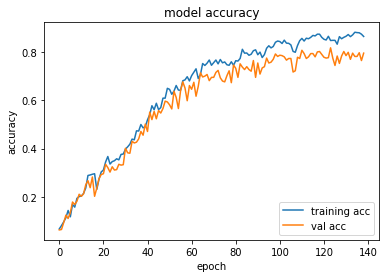

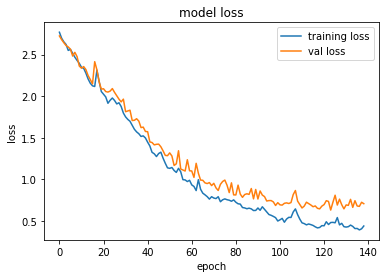

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# On va plot la fonction de perte et de validation pour les meilleurs paramètres trouvé lors de la grid search. 

##les meilleurs paramètres: 
best_params=clf_best.best_params_
nbUnits=best_params['nbUnits']
learning_rate=best_params['learning_rate']

##créer l'architecture avec meilleurs paramètres: 
model = tfk.Sequential()
nbUnits = 16
lengthTimeseries = x_train[0].shape[0]
nbTimeseries = x_train[0].shape[1]
nbClasses=16
length = lengthTimeseries
model.add(tfk.layers.LSTM(units=nbUnits, activation='tanh',input_shape=(lengthTimeseries,nbTimeseries)))
model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
model.summary()
# Train the model avec meilleurs paramètres: 
optim = tfk.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy']) 
earlyStop = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history=model.fit(x_train, y_train.argmax(axis=1), validation_split=0.3, batch_size=256, 
                  epochs=200, callbacks=[earlyStop])
from sklearn.neural_network import MLPClassifier



# Plot the LEARNING CURVE avec les meilleurs paramètres: 
#display score


fig = plt.figure()
plt.plot(history.history['accuracy'],label='training acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

fig = plt.figure()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))



# IV/ Approche par les convolutions 1D

**Pour finir nous allons comparer les résultats avec un modèle incluant une couche de convolution 1D**

In [ ]:
params_grid = {'learning_rate': [ 0.1, 0.01],'filters':[16,10]}


import tensorflow as tf
import tensorflow.keras as tfk
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier




def create_conv1D(filters = 16, learning_rate = 0.001, nbUnits=16):
    # Create the model architecture
    #model = tfk.Sequential()
    #length = lengthTimeseries
    #model.add(tfk.layers.LSTM(units=nbUnits, activation='tanh',input_shape=(lengthTimeseries,nbTimeseries)))
    #model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
    #model.summary()
    model_2 = tfk.Sequential()
    nbUnits=16
    lengthTimeseries = x_train[0].shape[0]
    nbTimeseries = x_train[0].shape[1]
    nbClasses=14
    length = lengthTimeseries
    model_2.add(tfk.layers.Conv1D(filters=16, kernel_size=3, padding="valid", activation='relu',input_shape=(lengthTimeseries,nbTimeseries)))
    model_2.add(tfk.layers.Dense(nbClasses, activation='softmax'))
    model_2.summary()
    
    # Train the model 
    optim = tfk.optimizers.Adam(learning_rate=learning_rate)
    model_2.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy']) 
    return model_2



model_2 = KerasClassifier(build_fn=create_conv1D, epochs=200, batch_size=256, validation_split = 0.3)

clf_best_2 = GridSearchCV(model_2, param_grid = params_grid, cv = 3, scoring = 'accuracy')
earlyStop = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=5)
clf_best_2.fit(x_train, y_train.argmax(axis=1), epochs = 50, batch_size = 256,
             callbacks = [earlyStop])

In [ ]:
def create_model(n_classes, duration, n_channels, dropout_probability=0.2):
    # Define model, using functional API
    model_input = Input(shape=(duration, n_channels))

    # slice into channels
    channel_inputs = Lambda(lambda x: tensorflow.split(x, num_or_size_splits=n_channels, axis=-1))(model_input)

    features = []
    for channel in range(n_channels):
        channel_input = channel_inputs[channel]
        # high branch
        high = Conv1D(filters=8, kernel_size=7, padding='same', activation='relu', input_shape=(100, 1))(channel_input)
        high = AveragePooling1D(pool_size=2)(high)
        high = Conv1D(filters=4, kernel_size=7, padding='same', activation='relu')(high)
        high = AveragePooling1D(pool_size=2)(high)
        high = Conv1D(filters=4, kernel_size=7, padding='same', activation='relu')(high)
        high = Dropout(dropout_probability)(high)
        high = AveragePooling1D(pool_size=2)(high)
        # low branch
        low = Conv1D(filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(100, 1))(channel_input)
        low = AveragePooling1D(pool_size=2)(low)
        low = Conv1D(filters=4, kernel_size=3, padding='same', activation='relu')(low)
        low = AveragePooling1D(pool_size=2)(low)
        low = Conv1D(filters=4, kernel_size=3, padding='same', activation='relu')(low)
        low = Dropout(dropout_probability)(low)
        low = AveragePooling1D(pool_size=2)(low)
        # pooling branch
        ap_residual = AveragePooling1D(pool_size=2, input_shape=(100, 1))(channel_input)
        ap_residual = AveragePooling1D(pool_size=2)(ap_residual)
        ap_residual = AveragePooling1D(pool_size=2)(ap_residual)
        # channel output
        channel_output = concatenate([high, low, ap_residual])
        features.append(channel_output)

    features = concatenate(features)
    features = Flatten()(features)
    features = Dense(units=1936, activation='relu')(features)

    model_output = Dense(units=n_classes, activation='softmax')(features)

    model = Model(inputs=[model_input], outputs=[model_output])
    return model